In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE

In [2]:
np.random.seed(1000)

In [3]:
wine = load_wine()

X = wine['data'].astype(np.float64)

In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [6]:
isf = IsolationForest(n_estimators=150, contamination=0.01, random_state=1000)
Y_pred = isf.fit_predict(X)

In [7]:
Y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
set(Y_pred)

{-1, 1}

In [10]:
#Hacemos una prediccion con conjuntos de prueba
print('Outliers in the training set: {}'.format(np.sum(Y_pred == -1)))

X_test_1 = np.mean(X) + np.random.normal(0.0, 1.0, size=(50, 13))
X_test_2 = np.mean(X) + np.random.normal(0.0, 2.0, size=(50, 13))
X_test = np.concatenate([X_test_1, X_test_2], axis=0)

Y_test = isf.predict(X_test) * 2

Xf = np.concatenate([X, X_test], axis=0)
Yf = np.concatenate([Y_pred, Y_test], axis=0)

print(Yf[::-1])


tsne = TSNE(n_components=2, perplexity=5, n_iter=5000, random_state=1000)
X_tsne = tsne.fit_transform(Xf)

Outliers in the training set: 2
[ 2  2 -2 -2 -2 -2 -2  2  2  2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  2
 -2  2  2 -2 -2 -2  2 -2 -2 -2 -2  2  2 -2 -2 -2 -2 -2 -2  2  2 -2  2 -2
  2 -2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -2  2  2  2
  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


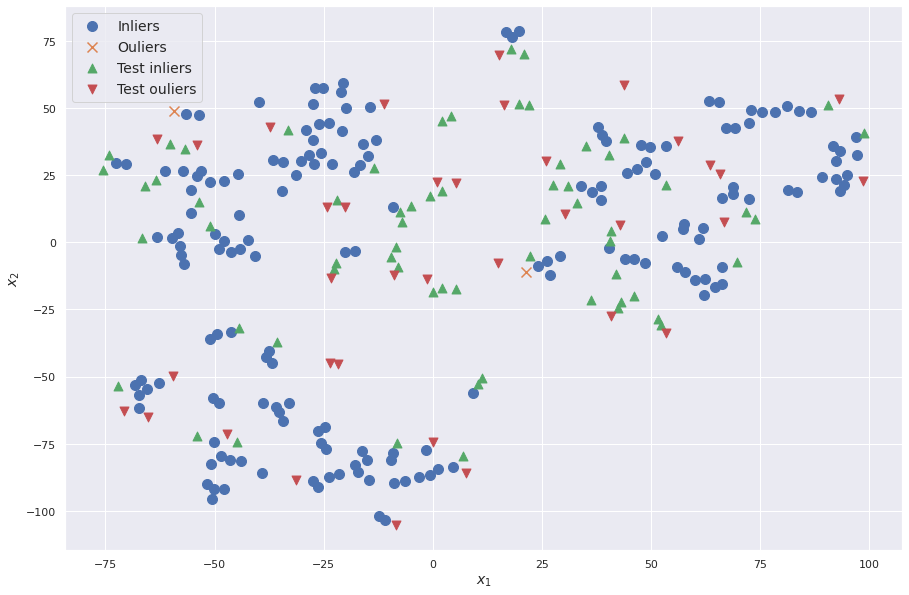

In [11]:

sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X_tsne[Yf == 1, 0], X_tsne[Yf == 1, 1], marker='o', s=100, label='Inliers')
ax.scatter(X_tsne[Yf == -1, 0], X_tsne[Yf == -1, 1], marker='x', s=100, label='Ouliers')
ax.scatter(X_tsne[Yf == 2, 0], X_tsne[Yf == 2, 1], marker='^', s=80, label='Test inliers')
ax.scatter(X_tsne[Yf == -2, 0], X_tsne[Yf == -2, 1], marker='v', s=80, label='Test ouliers')

ax.set_xlabel(r'$x_1$', fontsize=14)
ax.set_ylabel(r'$x_2$', fontsize=14)

ax.legend(fontsize=14)

plt.show()


Es importante hace el analisis de las variables para ver si se hace univariado sobre variable relevantes

De forma multivariado se ven datos que no son normales que no se detectarian de manera univariada.

Se recomienda primero hacerlo univariado y luego multivariado.